# Data Preparation & Exploration

## Load & Inspect Data

In [1]:
# Imports 
import pandas as pd     
import numpy as np       
import matplotlib.pyplot as plt  
import re
import seaborn as sns    
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder



In [2]:
club_df = pd.read_csv('Club_Penguin_All_Parties_FINAL.csv')

In [3]:
#Data Overview
club_df.head(10)

,Party,Start date,End date,Free items,Notes,Characters,Locations and the Special/Added Party Rooms,Year
0,Beta Test Party,"September 21, 3:00 PM (GMT and PST)",5:00 PM (GMT and PST),Party Hat,First ever party in Club Penguin.,NaN,NaN,2005
1,Halloween Party 2005,Oct-27,Oct-31,NaN,First ever Halloween party in Club Penguin. Fi...,NaN,NaN,2005
2,Puffle Discovery,Nov-15,Dec-04,NaN,First appearance of Puffles.,NaN,NaN,2005
3,Server Testing 2005,Dec-05,"February 13, 2006","Black Toque, Pink Toque, Blue Sunglasses, Red ...",NaN,NaN,NaN,2005
4,Christmas Party 2005,Dec-22,Dec-25,"Santa Hat, Christmas Scarf",First ever Christmas party in Club Penguin.,NaN,NaN,2005
5,Winter Luau,Jan-27,Jan-29,Hawaiian Lei,This was the only Winter Luau in Club Penguin.,NaN,NaN,2006
6,Valentine's Day Celebration,Feb-14,NaN,This was the only Valentine's Day party in Clu...,NaN,NaN,NaN,2006
7,Pizza Parlor Opening Party,Feb-24,Feb-27,"Chef Hat, Pizza Apron",First members-only party and first room openin...,NaN,NaN,2006
8,St. Patrick's Day Party 2006,Mar-17,Mar-22,Shamrock Hat,First St. Patrick's Day party in Club Penguin.,NaN,NaN,2006
9,April Fools' Party 2006,Mar-31,Apr-02,Red Propeller Cap,First April Fools' party in Club Penguin.,NaN,NaN,2006


In [4]:
club_df['Start date'].isna().value_counts()

Start date
False    205
True       8
Name: count, dtype: int64

In [5]:
club_df['End date'].isna().value_counts()

End date
False    203
True      10
Name: count, dtype: int64

### Potential Questions to Consider for Analysis
 **Participation Trends:**  
   - *Which types of parties (e.g., seasonal, franchise collaborations) had the highest participation rates or user engagement over time?*  

**Seasonality Effects:**  
   - *Are there particular months or seasons where parties were more popular or had more events?*  

**Theme Popularity:**  
   - *Did certain party themes (e.g., music, adventure, holidays) attract more players compared to others?*  
   This question can't be answered since we do not know the population of the people that attended these events, but we could keep this question for future analysis.


### Basic Exploration

In [6]:
#check shape of data
print("Shape of the data:", club_df.shape)

Shape of the data: (213, 8)


In [7]:
#check data type and missing values
club_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 8 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Party                                        209 non-null    object
 1   Start date                                   205 non-null    object
 2   End date                                     203 non-null    object
 3   Free items                                   176 non-null    object
 4   Notes                                        92 non-null     object
 5   Characters                                   103 non-null    object
 6   Locations and the Special/Added Party Rooms  148 non-null    object
 7   Year                                         213 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 13.4+ KB


In [8]:
#checking for missing values more details
club_df.isnull().sum()

Party                                            4
Start date                                       8
End date                                        10
Free items                                      37
Notes                                          121
Characters                                     110
Locations and the Special/Added Party Rooms     65
Year                                             0
dtype: int64

### Steps to Handle Missing Data
- Drop Notes (92 non-null) and Characters (103 non-null) because they're either too incomplete or not significant for the analysis.
- Use the Year column to approximate the missing Start date and End date.
- Retain Locations and the Special/Added Party Rooms and explore if repeated parties are likely to occur in the same locations.
- Retain and fill missing values with a placeholder like "Unknown," as it could be useful in party classifications.
- Use models like RandomForestClassifier to predict missing values in certain columns if patterns exist.
- Drop rows where party is missing.



In [9]:
# Drop 'Notes' and 'Characters' columns (explained above)
club_df = club_df.drop(columns=['Notes', 'Characters'])

In [10]:
# Fill missing 'Start date' and 'End date' using 'Year'
club_df['Start date'] = club_df['Start date'].fillna(club_df['Year'].astype(str))
club_df['End date'] = club_df['End date'].fillna(club_df['Year'].astype(str))

In [11]:
club_df.head(1)

,Party,Start date,End date,Free items,Locations and the Special/Added Party Rooms,Year
0,Beta Test Party,"September 21, 3:00 PM (GMT and PST)",5:00 PM (GMT and PST),Party Hat,NaN,2005


In [12]:
# Fill missing 'Free items' with a placeholder
club_df['Free items'] = club_df['Free items'].fillna('Unknown')


In [13]:
# Retain 'Locations and the Special/Added Party Rooms' with its current missing values
# Further analysis can check repeated parties for location trends using Random Forest Classifier 


In [14]:
# Drop rows where "Party" is missing
club_df = club_df.dropna(subset=['Party'])


In [15]:
# Quick Data Summary After Cleaning
print("Data after cleaning:")
print(club_df.info())



Data after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 209 entries, 0 to 212
Data columns (total 6 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Party                                        209 non-null    object
 1   Start date                                   209 non-null    object
 2   End date                                     209 non-null    object
 3   Free items                                   209 non-null    object
 4   Locations and the Special/Added Party Rooms  148 non-null    object
 5   Year                                         209 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 11.4+ KB
None


In [16]:
# Descriptive Stats doubt their will be any
club_df.describe()

,Year
count,209.000000
mean,2011.028708
std,3.297601
min,2005.000000
25%,2008.000000
50%,2011.000000
75%,2014.000000
max,2017.000000


### Feature Engineering

In [17]:
# Check Values in each column for Feature Engineering
club_df['Party'].value_counts()

Party
New Year's Day 2016      2
Halloween Party 2016     2
New Year's Day 2012      2
Puffle Party 2016        2
New Year's Day 2015      2
                        ..
The Fair 2009            1
4th Anniversary Party    1
Halloween Party 2009     1
Fire Dojo opening        1
Waddle On Party          1
Name: count, Length: 202, dtype: int64

### Clean the party column by removing years from the titles
- Including years (e.g., "2016", "2015") may create duplicates for the same party type (e.g., "New Year's Day").
- Removing the year will group similar parties together, reducing noise in the data.

In [18]:
# Function to remove years from party names
def strip_years(party_name):
    return re.sub(r'\s*\d{4}', '', party_name).strip()  # Remove any 4-digit year and leading/trailing spaces

# Apply the function
club_df['Party'] = club_df['Party'].apply(strip_years)

In [19]:
club_df['Party'].value_counts()

Party
New Year's Day             13
Halloween Party            13
Puffle Party                9
Holiday Party               7
April Fools' Party          7
                           ..
Adventure Party             1
Snow Sculpture Showcase     1
Dance-A-Thon                1
Dig Out the Dojo            1
Waddle On Party             1
Name: count, Length: 120, dtype: int64

### Standardize Start and End Dates (Takes to long just going to drop)
- Inconsistent date formats (int vs. object) make it hard to process or compare dates.
- Convert both to a standard datetime format for uniformity and future operations like duration calculations.

In [20]:
# Drop original date columns
club_df = club_df.drop(columns=['Start date', 'End date'])


In [21]:
club_df.head(1)

,Party,Free items,Locations and the Special/Added Party Rooms,Year
0,Beta Test Party,Party Hat,NaN,2005


In [22]:
club_df['Free items'].value_counts()

Free items
To see the list of free items, see the main article     34
Unknown                                                 33
To see the list of free items, see the main article.     9
Miners Helmet                                            3
Bandana                                                  2
                                                        ..
Sailor Hat, Black and Red Sailor Shirt                   1
Red Propeller Cap, Swirly Glasses                        1
Green Bunny Ears                                         1
Gigantic St. Patrick's Hat                               1
11th Anniversary Hat, Aunt Arctic's Press Giveaway       1
Name: count, Length: 131, dtype: int64

### Combining the Items in the "Free Items" Category

In [23]:
# Define a function to unify the text
def clean_free_items(item):
    if pd.isna(item):  # Check for missing or null values
        return "Unspecified"
    
    # Normalize the item (strip spaces, lowercase, and remove extra whitespace)
    item_normalized = ' '.join(item.strip().lower().split())  # Normalize whitespace
    
    # Combine all related entries under "Unspecified"
    if item_normalized in [
        "unknown",
        "to see the list of free items, see the main article",
        "to see the list of free items, see the main article."
    ]:
        return "Unspecified"
    
    return item.strip()  # Return cleaned item (trim spaces)


In [24]:
# Apply the function to clean "Free_Items"
club_df['Free items'] = club_df['Free items'].apply(clean_free_items)
club_df['Free items'].value_counts()

Free items
Unspecified                                           76
Miners Helmet                                          3
Bandana                                                2
Shamrock Hat                                           2
Pink Bunny Ears                                        2
                                                      ..
Red Propeller Cap, Swirly Glasses                      1
Green Bunny Ears                                       1
Gigantic St. Patrick's Hat                             1
Red Hard Hat                                           1
11th Anniversary Hat, Aunt Arctic's Press Giveaway     1
Name: count, Length: 129, dtype: int64

### Handle Locations
- Locations are varied and inconsistent (e.g., some are single locations, others are lists).
- Clean the location data to extract meaningful features, such as number of rooms, key locations, or keep as-is if meaningful patterns exist.
- Primary Location: Main event location (e.g., "Club Penguin Island").
- Special Rooms: Separate these into a new column.



In [25]:
club_df['Locations and the Special/Added Party Rooms'].value_counts()

Locations and the Special/Added Party Rooms
Club Penguin Island                                                                   14
Everywhere                                                                            13
Iceberg and Ski Hill                                                                   5
Coffee Shop                                                                            4
Backstage                                                                              2
                                                                                      ..
Glade, Wilderness (room), Cliff, Shore, Bay and Brown Puffle Cave                      1
Santa's Sled, ???                                                                      1
Dojo Courtyard, Water Dojo                                                             1
Secret Laboratory, Haunted House, Haunted House Entrance, Dark Swamp, Dark Chamber     1
The last party to be held in Club Penguin.                        

### Prep for SMOTE
- We can filter out locations and parties with only 1 occurrence, then apply SMOTE to the remaining data.

In [55]:
# Drop rows where Party and Locations have only 1 sample (rare classes)
party_counts = club_df['Party'].value_counts()
location_counts = club_df['Location_encoded'].value_counts()

In [56]:
# Filter out parties with only 1 occurrence and locations with only 1 occurrence
data_ml = club_df[club_df['Party'].isin(party_counts[party_counts > 1].index)]
data_ml = club_df[club_df['Location_encoded'].isin(location_counts[location_counts > 1].index)]

In [26]:
club_df['Year'].value_counts()

Year
2015    23
2014    20
2009    19
2011    19
2006    18
2008    18
2012    18
2013    18
2010    17
2007    16
2016    15
2005     5
2017     3
Name: count, dtype: int64

## Data Visualization for Analysis Questions

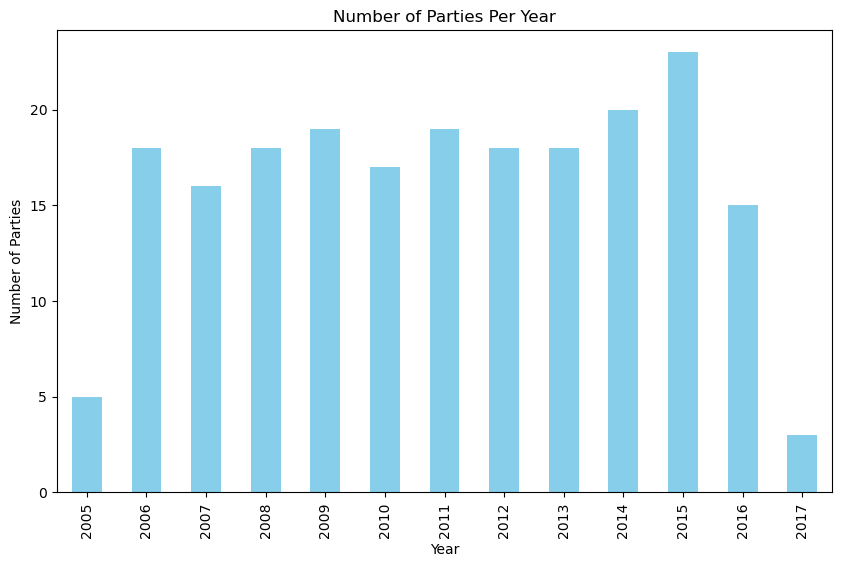

In [27]:
# Plot the number of parties per year
plt.figure(figsize=(10, 6))
club_df['Year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Number of Parties Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Parties")
plt.show()

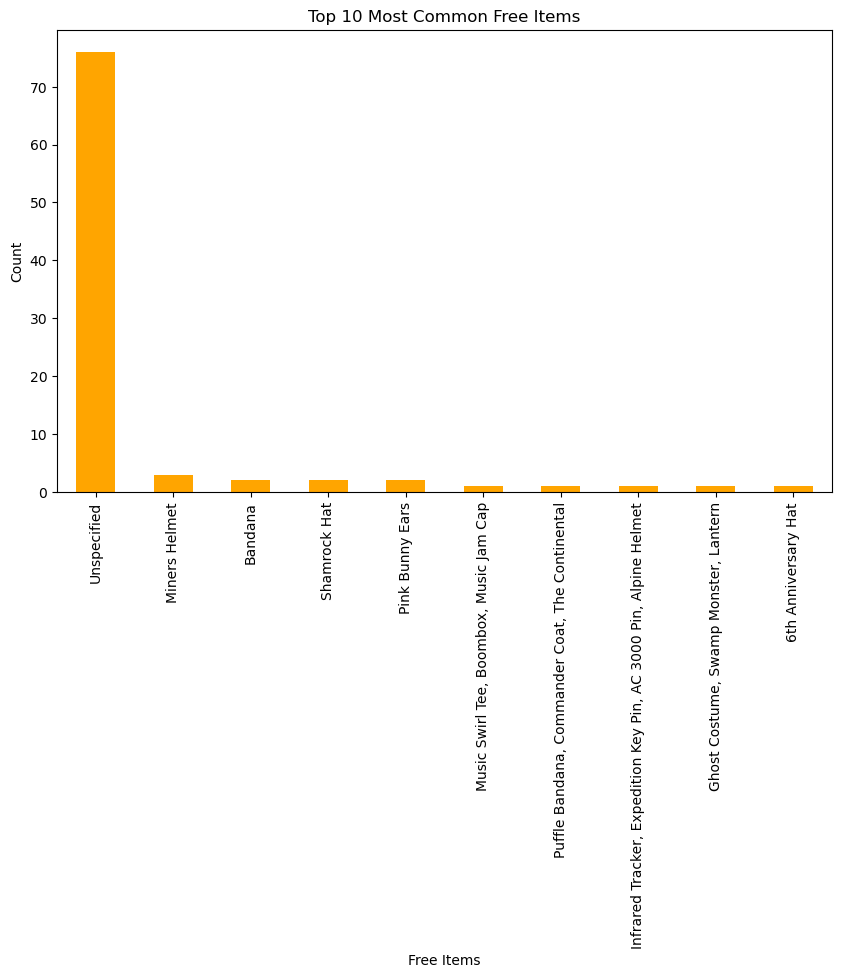

In [28]:
# Analyze free items distribution (top 10)
plt.figure(figsize=(10, 6))
club_df['Free items'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Most Common Free Items")
plt.xlabel("Free Items")
plt.ylabel("Count")
plt.show()

## Predict Missing Locations Using Classification

In [58]:
#Prepare the data for classification
data_ml = club_df.dropna(subset=['Locations and the Special/Added Party Rooms'])  # Use only rows with locations
X = pd.get_dummies(data_ml[['Year', 'Party']], drop_first=True)  # Features
y = data_ml['Location_encoded']  # Target

In [54]:
data_ml['Location_encoded'].value_counts()

Location_encoded
12    14
31    13
49     5
21     4
7      2
      ..
40     1
72     1
27     1
76     1
89     1
Name: count, Length: 108, dtype: int64

In [35]:
# Encode the 'Location' column as a target
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Convert categorical labels to numeric

In [61]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Apply undersampling to balance the classes
undersample = RandomUnderSampler(sampling_strategy='auto')
X_train_res, y_train_res = undersample.fit_resample(X_train, y_train)

In [63]:
# Apply SMOTE to the training set only
smote = SMOTE(sampling_strategy='auto', k_neighbors=4)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 5, n_samples_fit = 1, n_samples = 1

In [37]:
# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [38]:
# Evaluate the model
y_pred = model.predict(X_test)
print("\nClassification Report for Location Prediction:")
print(classification_report(y_test, y_pred))


Classification Report for Location Prediction:
              precision    recall  f1-score   support

          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.67      0.80      0.73         5
          17       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         0
          28       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          31       0.29      0.67      0.40         3
          33       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         0
          42       0.00      0.00      0.00         0
          43       0.00      0.00      0.00         1
          44       0.00      0.00      0.00         1
          46       0.00      0.00      0.00         1
          49       0.00      0.00

/opt/anaconda3/envs/cohort_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cohort_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cohort_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result

Based on the classification report, the Random Forest classifier is not performing well for the location prediction task. The precision, recall, and f1-scores for most of the locations are 0, and the accuracy is only 20%. This indicates that the model is likely struggling to distinguish between classes, possibly due to issues with data imbalance, feature quality, or model overfitting/underfitting.

### Random Forest with Hyperparameter Tuning

In [50]:
# Random Forest Classifier with Hyperparameter Tuning
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5]
}
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Best Random Forest Model
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Print Classification Report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))


/opt/anaconda3/envs/cohort_env/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Random Forest Classification Report:


ValueError: Number of classes, 37, does not match size of target_names, 108. Try specifying the labels parameter

In [60]:
# List of models to test
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred))

NameError: name 'X_train_res' is not defined

In [46]:
# Option 2: Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg, target_names=label_encoder.classes_))


Logistic Regression Classification Report:


/opt/anaconda3/envs/cohort_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: Number of classes, 25, does not match size of target_names, 108. Try specifying the labels parameter

In [ ]:

# Option 3: Support Vector Machine (SVM)
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_res, y_train_res)
y_pred_svm = svm.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_))


In [ ]:

# Option 4: Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train_res, y_train_res)
y_pred_gbc = gbc.predict(X_test)
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gbc, target_names=label_encoder.classes_))


In [ ]:

# Option 5: K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_res, y_train_res)
y_pred_knn = knn.predict(X_test)
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn, target_names=label_encoder.classes_))